**LIFE EXPECTANCY AND ECONOMY STATUS AROUND THE WORLD**
 

  **Average life expectancy of both genders and Economy status of different countries from 2010 to 2015**

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



**ABOUT DATASET**


Data contains life expectancy, health, immunization, and economic and demographic information about 179 countries from 2000-2015 years.It has 21 variables and 2864 rows.

FEATURES


---
1.   Country: List of the 179 countries
2.   Region: 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc.
3.  Year: Years observed from 2000 to 2015 
4. Infant_deaths: Represents infant deaths per 1000 population  
5.   Under_five_deaths: Represents deaths of children under five years old per 1000 population
6.   Adult_mortality: Represents deaths of adults per 1000 population
7.   Alcohol_consumption: Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
8.  Hepatitis_B: Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds. 
9.   Measles: Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
10.   BMI: BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of height in m
11.   Polio: Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
12.  Diphtheria: Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
13.   Incidents_HIV: Incidents of HIV per 1000 population aged 15-49
14.   GDP_per_capita: GDP per capita in current USD
15.   Population_mln: Total population in millions
16.   Thinness_ten_nineteen_years: Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
17.   Thinness_five_nine_years: Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
18.   Schooling: Average years that people aged 25+ spent in formal education
19.   Economy_status_Developed: Developed country
20.   Economy_status_Developing: Developing county
21.   Life_expectancy: Average life expectancy of both genders in different years from 2010 to 2015







 **LOADING AND DISPLAYING DATASET** 

In [2]:
df_original = pd.read_csv('/content/drive/MyDrive/DATA_SET/Life-Expectancy-Data-Updated.csv')
print(df_original.head())
print(df_original.tail())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.

**PREPROCESSING THE DATASET**

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [4]:
df_original.shape

(2864, 21)

In [5]:
df_original.isna().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [6]:
df_original.duplicated().sum()

0

In [7]:
df_original.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [8]:
df = df_original.copy()

**Adding one more column 'Economy_status'**

In [9]:
lst = []
for i in range(0,df.shape[0]):
  if df['Economy_status_Developed'][i] == 0:
    lst.append('Developing')
  else:
    lst.append('Developed')
df['Economy_status'] = lst

**Dropping columns, 'Economy_status_Developed' &   'Economy_status_Developing'**

In [10]:
df.drop(columns = ['Economy_status_Developed','Economy_status_Developing'],inplace = True)


**Making column values as 0 and 1 for 'Economy_status'**

In [11]:
df['Economy_status'] = df['Economy_status'].map({'Developing':0,'Developed':1})

In [12]:
print(df.head())
print(df.tail())

   Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  \
0         105.8240                 1.32           97       65  27.8     97   
1          57.9025                10.35           97       94  26.0     97   
2         201.0765                 1.57           60       35  21.2     67   
3         222.1965                 5.68           93       74  25.3     92   
4          57.9510                 2.89           97       89  27.0     94   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006  

**Details of Country, Region and Year**

In [13]:
country = df['Country'].unique() 
print(country)
print()
print('Number of distinct countries:',len(country))
print()
df['Country'].value_counts()

['Turkiye' 'Spain' 'India' 'Guyana' 'Israel' 'Costa Rica'
 'Russian Federation' 'Hungary' 'Jordan' 'Moldova' 'Brazil' 'Malta'
 'Bahamas, The' 'Ukraine' 'Switzerland' 'Norway' 'Finland' 'Comoros'
 'Japan' 'Gabon' 'Ghana' 'Philippines' 'Congo, Rep.' 'Madagascar'
 'Estonia' 'Belize' 'Kazakhstan' 'Cameroon' 'Zimbabwe' 'Bhutan'
 'South Africa' 'Eritrea' 'Germany' 'Saudi Arabia' 'Kiribati' 'Seychelles'
 'Singapore' 'Togo' 'Denmark' 'Gambia, The' 'Sweden' 'Austria'
 'Kyrgyz Republic' 'Grenada' 'Brunei Darussalam' 'Greece' 'Uruguay'
 'Croatia' 'Romania' 'Central African Republic' 'Algeria' 'Yemen, Rep.'
 'Armenia' 'St. Vincent and the Grenadines' 'Kenya'
 'Micronesia, Fed. Sts.' 'Antigua and Barbuda' 'Nepal' 'Lithuania'
 'Vanuatu' 'Afghanistan' 'Kuwait' 'Argentina' 'Panama' 'Oman' 'France'
 'Bosnia and Herzegovina' 'Mauritania' 'Somalia' 'Azerbaijan' 'Maldives'
 'Guinea-Bissau' 'Solomon Islands' 'Congo, Dem. Rep.' 'Namibia' 'Eswatini'
 'Nigeria' 'United Arab Emirates' 'Burundi' 'Tajikistan' 'H

Turkiye            16
Slovak Republic    16
Latvia             16
Angola             16
Jamaica            16
                   ..
Kuwait             16
Argentina          16
Panama             16
Oman               16
Georgia            16
Name: Country, Length: 179, dtype: int64

In [14]:
region = df['Region'].unique()
print(region)
print()
print('Number of distinct Regions:',len(region))
print()
df['Region'].value_counts()

['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']

Number of distinct Regions: 9



Africa                           816
European Union                   432
Asia                             432
Central America and Caribbean    304
Rest of Europe                   240
Middle East                      224
South America                    192
Oceania                          176
North America                     48
Name: Region, dtype: int64

In [15]:
year = df['Year'].sort_values().unique()
print(year)
print()
print('Number of distinct Years:',len(year))
print()
df['Year'].value_counts()

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]

Number of distinct Years: 16



2015    179
2007    179
2006    179
2012    179
2000    179
2001    179
2008    179
2011    179
2002    179
2013    179
2005    179
2003    179
2004    179
2009    179
2010    179
2014    179
Name: Year, dtype: int64

**Details of highest Life Expectancy**

In [16]:
df[['Life_expectancy']].max()

Life_expectancy    83.8
dtype: float64

In [17]:
print('DETAILS OF HIGHEST LIFE_EXPECTANCY:')
print('----------------------------------------','\n')
df.loc[df['Life_expectancy'] == 83.8]

DETAILS OF HIGHEST LIFE_EXPECTANCY:
---------------------------------------- 



,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_status
1196,Japan,Asia,2015,2.0,2.7,53.586,8.55,83,93,22.7,99,96,0.17,34961,127.14,2.1,1.8,12.5,83.8,1


In [18]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_status
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,68.856075,0.206704
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,9.405608,0.405012
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,39.400000,0.000000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,62.700000,0.000000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,71.400000,0.000000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,75.400000,0.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,83.800000,1.000000


In [19]:
df_numeric = df.iloc[:,3:]
corr_matrix = df_numeric.corr()
corr_matrix

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_status
Infant_deaths,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-0.920032,-0.475866
Under_five_deaths,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-0.920419,-0.427134
Adult_mortality,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-0.945360,-0.429375
Alcohol_consumption,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,0.399159,0.670366
Hepatitis_B,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,0.417804,0.113534
Measles,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,0.490019,0.298693
BMI,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,0.598423,0.243287
Polio,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,0.641217,0.283260
Diphtheria,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,0.627541,0.289417
Incidents_HIV,0.349458,0.369618,0.699119,-0.034118,-0.075782,-0.150580,-0.161142,-0.147952,-0.146932,1.000000,-0.169590,-0.058040,0.188765,0.193847,-0.201246,-0.553027,-0.175635


In [20]:
corr_matrix1 = corr_matrix[['Economy_status','Life_expectancy']]
corr_matrix1

,Economy_status,Life_expectancy
Infant_deaths,-0.475866,-0.920032
Under_five_deaths,-0.427134,-0.920419
Adult_mortality,-0.429375,-0.945360
Alcohol_consumption,0.670366,0.399159
Hepatitis_B,0.113534,0.417804
Measles,0.298693,0.490019
BMI,0.243287,0.598423
Polio,0.283260,0.641217
Diphtheria,0.289417,0.627541
Incidents_HIV,-0.175635,-0.553027


**VISUALIZATION**

**Correlation plot of all the features**

<Axes: >

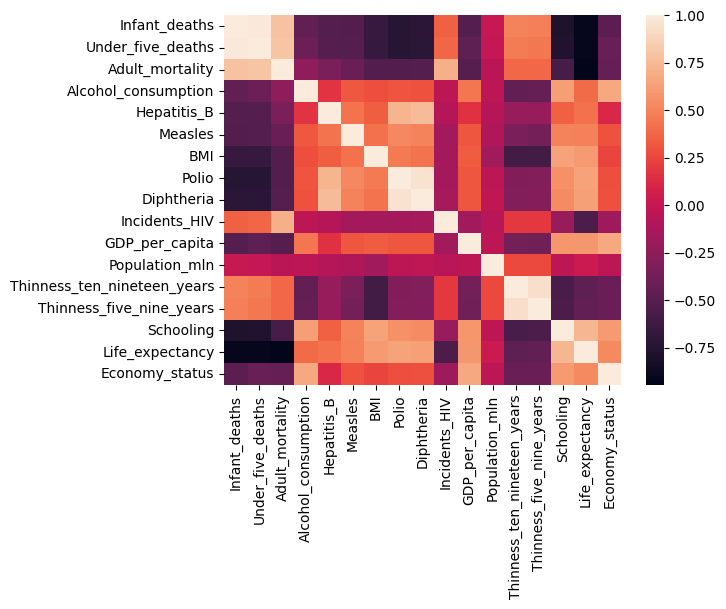

In [21]:
sns.heatmap(corr_matrix)

<Axes: >

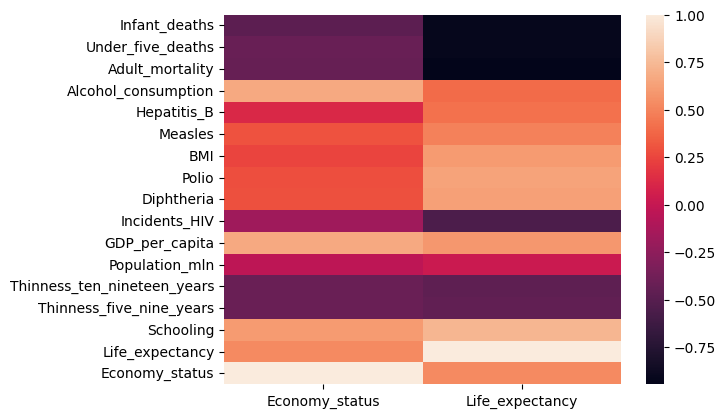

In [22]:
sns.heatmap(corr_matrix1)

The following are some insights from this correlation heatmap:


*   Features, GDP_per_capita, Alcohol_consumption, schooling and Life_expectancy have some positive correlation (>0.5) with Economy_status. So that we can assume that the development of a country depends on these features. 
*   Life_expectancy is strongly, negatively correlated with Infant_deaths, Under_five_deaths, Adult_morality as the former increases when the latter decreases. Also Life_expectancy depends on features like BMI, Polio, Diphtheria, Incidents_HIV, GDP_per_capita, Schooling, Ecocnomy_status since their correlation values are either less than -0.5 or greater than 0.5  


*  Life_expectancy and Economy_status are mutually correlated. 
*  GDP_per_capita, Schooling are the common features related to Life_expectancy and Economy_status. 





**Pair plot of all features**

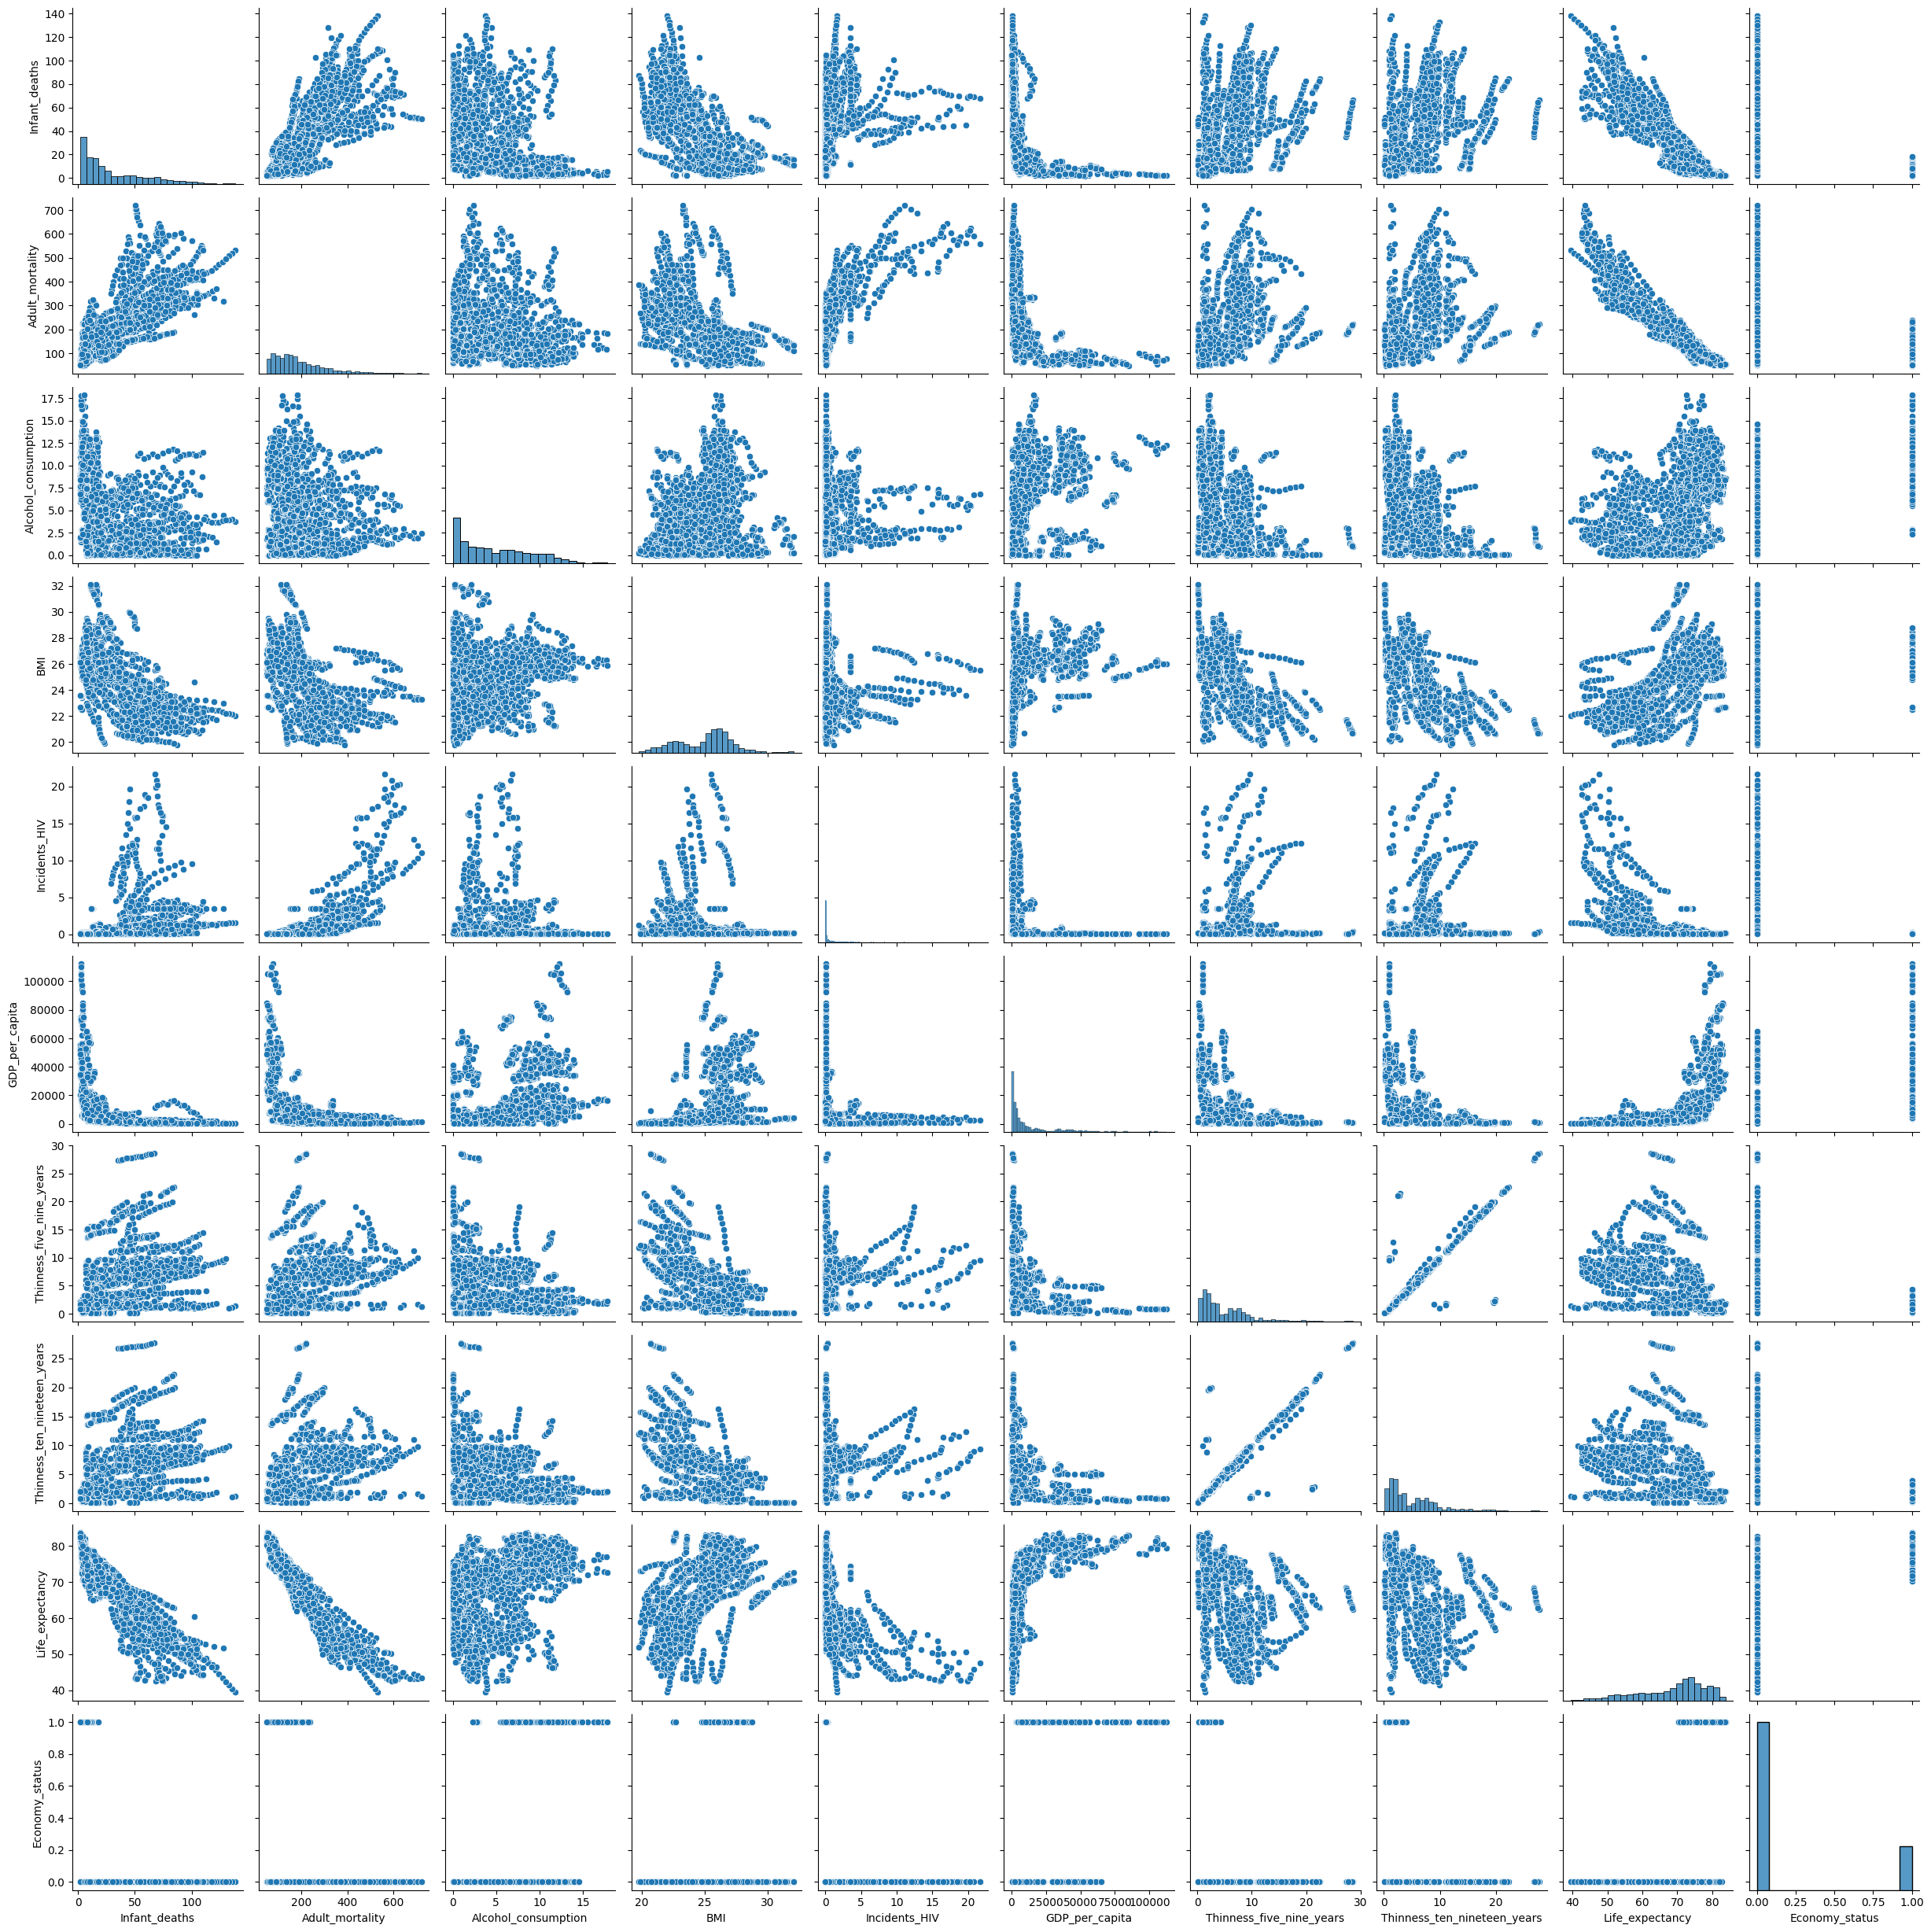

In [23]:
df_pair =pd.concat([df['Infant_deaths'],df['Adult_mortality'],df['Alcohol_consumption'],df['BMI'],df['Incidents_HIV'],
                     df['GDP_per_capita'],df['Thinness_five_nine_years'],df['Thinness_ten_nineteen_years'],
                     df['Life_expectancy'],df['Economy_status']],axis = 1)

sns.pairplot(df_pair)

**Distribution of Life Expectancy around the world**


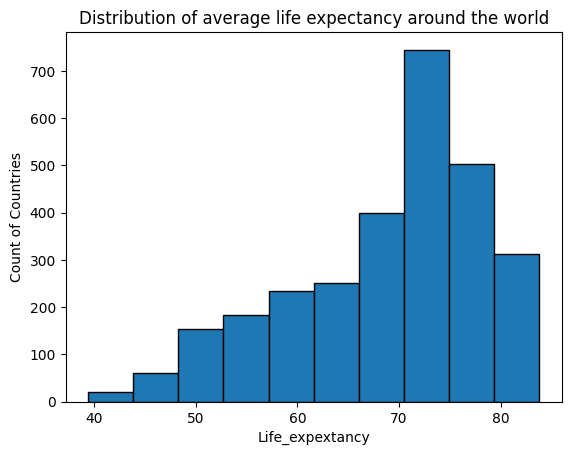

<Axes: xlabel='Life_expectancy', ylabel='Density'>

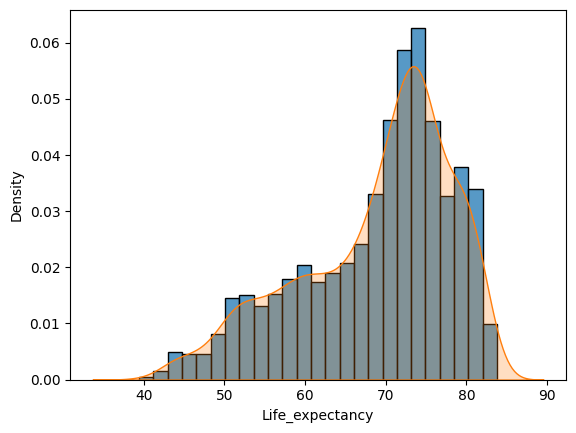

In [24]:
plt.hist(df['Life_expectancy'],edgecolor = 'black')
plt.xlabel('Life_expextancy')
plt.ylabel('Count of Countries')
plt.title('Distribution of average life expectancy around the world')
plt.show()

sns.histplot(df['Life_expectancy'],stat = 'density')
sns.kdeplot(df['Life_expectancy'],fill = True)



The distribution of Life_expectancy is negatively skewed since more obsevations are concentrated on the right side. Also density is very small on low life_expectancy. This indicates that more countries have high life expectancies.

**Violin Plot of Life Expectancy v/s Economy status around the world**

Text(0.5, 1.0, 'Life_expectancy v/s Economy_status around the world')

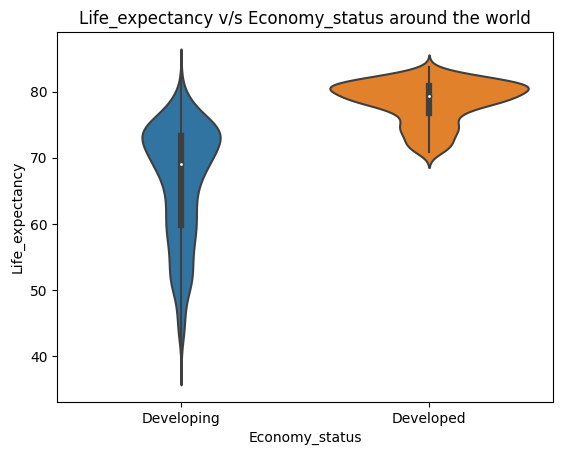

In [25]:
df['Economy_status'] = df['Economy_status'].map({0:'Developing',1:'Developed'})
sns.violinplot(data = df, x = 'Economy_status', y ='Life_expectancy')
plt.title('Life_expectancy v/s Economy_status around the world')

From this Violin plot its evident that Developed Countries have high life expectancies (greater than 80)

**Exploring Life_expectancy and Economy_status by Region**

In [26]:
avg_life_expectancy_region_wise = df.groupby('Region').Life_expectancy.mean()
print(avg_life_expectancy_region_wise)


Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


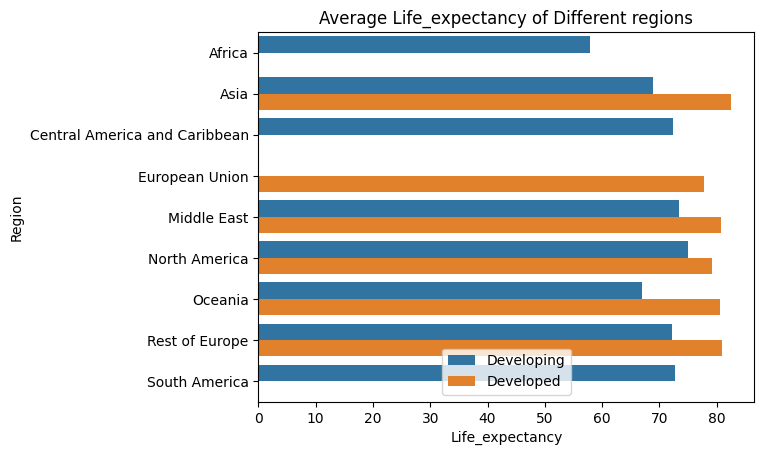

In [27]:
# perform groupby
df1 = df.groupby(['Region','Economy_status']).mean('Life_expectancy')
df1 = df1.reset_index()
  
# plot barplot
sns.barplot(y ='Region',x ='Life_expectancy',data=df1,orient = 'h',hue = 'Economy_status')
plt.ylabel('Region')
plt.title('Average Life_expectancy of Different regions')
plt.legend(loc = 'lower center')
plt.show()

Bar Plot gives the following informations:

*   Asia is the highest and Africa is the lowest life_expectancy regions.
*   Africa, Central America and Caribbean, South America don't have developed countries while European Union has only developed counties.


*  Developed countries have life_expectancy greater than 75.  






**Exploring Life_expectancy by Year**

In [28]:
avg_life_expectancy_year_wise = df.sort_values('Year').groupby('Year').Life_expectancy.mean()
avg_life_expectancy_year_wise

Year
2000    66.360335
2001    66.650279
2002    66.886592
2003    67.170391
2004    67.549721
2005    67.856425
2006    68.221788
2007    68.588268
2008    68.991061
2009    69.388827
2010    69.777095
2011    70.177095
2012    70.521788
2013    70.877095
2014    71.216760
2015    71.463687
Name: Life_expectancy, dtype: float64

**Average Life Expectancy of each Year from 2000 to 2015 around the world**

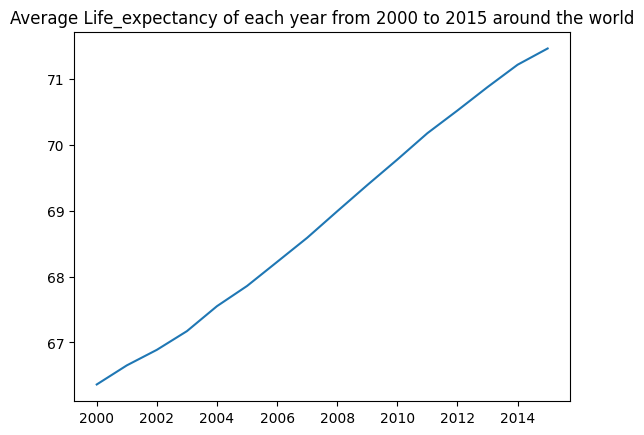

In [29]:
plt.plot(avg_life_expectancy_year_wise)
plt.title('Average Life_expectancy of each year from 2000 to 2015 around the world')
plt.show()

From 2000 to 2015 Life_expectany increases significantly across the world

**Comparison of Average Life Expectancies of different Regions**

In [30]:
df_asia = df.loc[df['Region'] == 'Asia']
df_Middle_East = df.loc[df['Region'] == 'Middle East']
df_European_Union = df.loc[df['Region'] == 'European Union']
df_South_America = df.loc[df['Region'] == 'South America']
df_Central_America_Caribbean = df.loc[df['Region'] == 'Central America and Caribbean']
df_Rest_Europe = df.loc[df['Region'] == 'Rest of Europe']
df_Africa = df.loc[df['Region'] == 'Africa']
df_Oceania = df.loc[df['Region'] == 'Oceania']
df_North_America = df.loc[df['Region'] == 'North America']

In [31]:
df_asia_year = df_asia.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_Middle_East_year = df_Middle_East.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_European_Union_year = df_European_Union.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_South_America_year = df_South_America.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_Central_America_Caribbean_year = df_Central_America_Caribbean.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_Rest_Europe_year = df_Rest_Europe.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_Africa_year = df_Africa.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_Oceania_year = df_Oceania.sort_values('Year').groupby('Year').Life_expectancy.mean()
df_North_America_year = df_North_America.sort_values('Year').groupby('Year').Life_expectancy.mean()

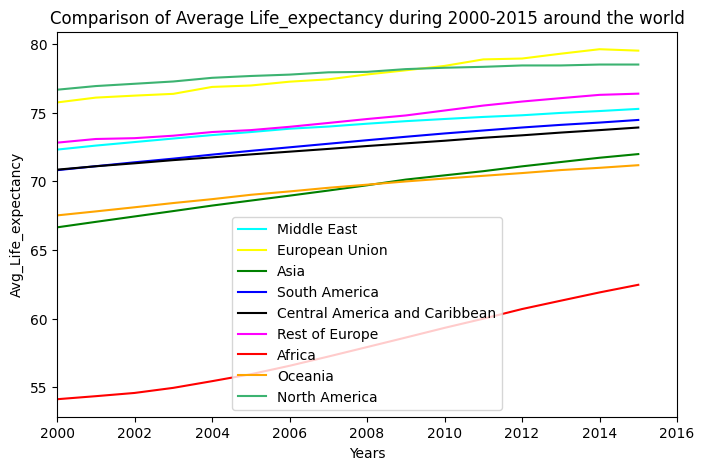

In [32]:
plt.figure(figsize = (8,5))
plt.plot(df_Middle_East_year,'cyan')
plt.plot(df_European_Union_year,'yellow')
plt.plot(df_asia_year,'green')
plt.plot(df_South_America_year,'blue')
plt.plot(df_Central_America_Caribbean_year,'black')
plt.plot(df_Rest_Europe_year,'magenta')
plt.plot(df_Africa_year,'red')
plt.plot(df_Oceania_year,'orange')
plt.plot(df_North_America_year,'mediumseagreen')


plt.xlim(2000,2016)
plt.xlabel('Years')
plt.ylabel('Avg_Life_expectancy')
plt.title('Comparison of Average Life_expectancy during 2000-2015 around the world')
plt.legend(labels = region,loc = 'lower center',draggable = True)
plt.show()

In this plot of year-wise average life expectancy, its clear that:


*   Africa has lowest average life expectancy during 2000-2015. Although it shows a rise during these years, life expectancy didn't go beyond 65. But for all other regions life expectancy is greater than 65 from 2000 onwards.
*   European Union and North America have highest average life expectancy even in 2000 and continued the same till 2015.


*   From 2000 to 2003 the life expectancy of South America and Central America and Caribbean intersecting each other. 
*   In 2008 Asia and Oceania have equal life expectancy. From 2008 onwards the life expectancy of Asia increased significantly than Oceania.


*   Similarly, from 2010 onwards the life expectancy of European Union has a rise than North America.








**Exploring Life Expectancy and Economy Status of the Countries of Asia**

In [33]:
df['Economy_status'] = df['Economy_status'].map({'Developing':0,'Developed':1})

Country
Afghanistan            59.65625
Albania                75.95000
Algeria                73.78750
Angola                 52.82500
Antigua and Barbuda    75.35000
                         ...   
Venezuela, RB          72.79375
Vietnam                74.33125
Yemen, Rep.            64.16250
Zambia                 52.33125
Zimbabwe               48.66250
Name: Life_expectancy, Length: 179, dtype: float64


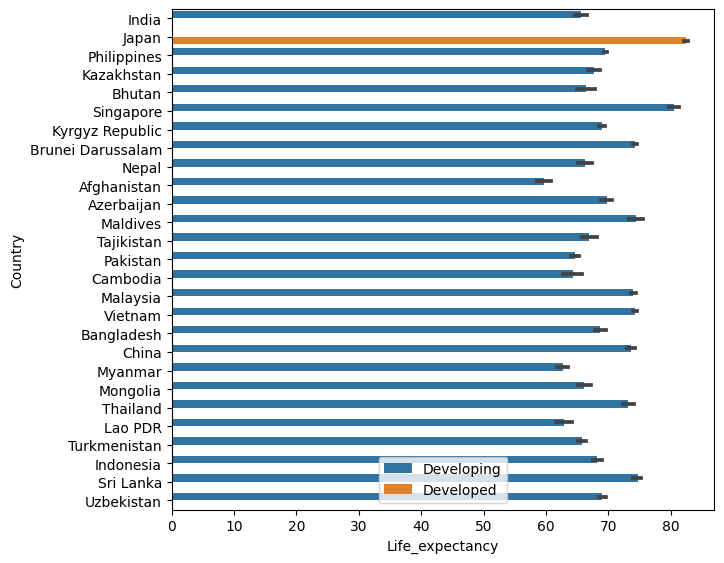

In [34]:
avg_life_expextancy_asia_country_wise = df.groupby('Country').Life_expectancy.mean()
print(avg_life_expextancy_asia_country_wise)

plt.figure(figsize = (7,6.5))
sns.barplot(data = df_asia, y = 'Country',x = 'Life_expectancy',orient = 'h',hue = 'Economy_status')

plt.legend(loc = 'lower center')
plt.show()

Its evident that Japan is the only developed country in Asia and has the highest life expectancy compared to other countries.  

**Comparison of all the features of India and Japan**

In [35]:
df_india = df.loc[df['Country'] == 'India']
df_india = df_india.sort_values('Year').groupby('Year').mean('Life_expectancy')
df_india = df_india.reset_index()

df_japan = df.loc[df['Country'] == 'Japan']
df_japan = df_japan.sort_values('Year').groupby('Year').mean('Life_expectancy')
df_japan = df_japan.reset_index()


In [36]:
column = list(df.columns[3:])
column

['Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Life_expectancy',
 'Economy_status']

Text(0.5, 0.98, 'Comparison of all features of India and Japan from 2000 to 2015')

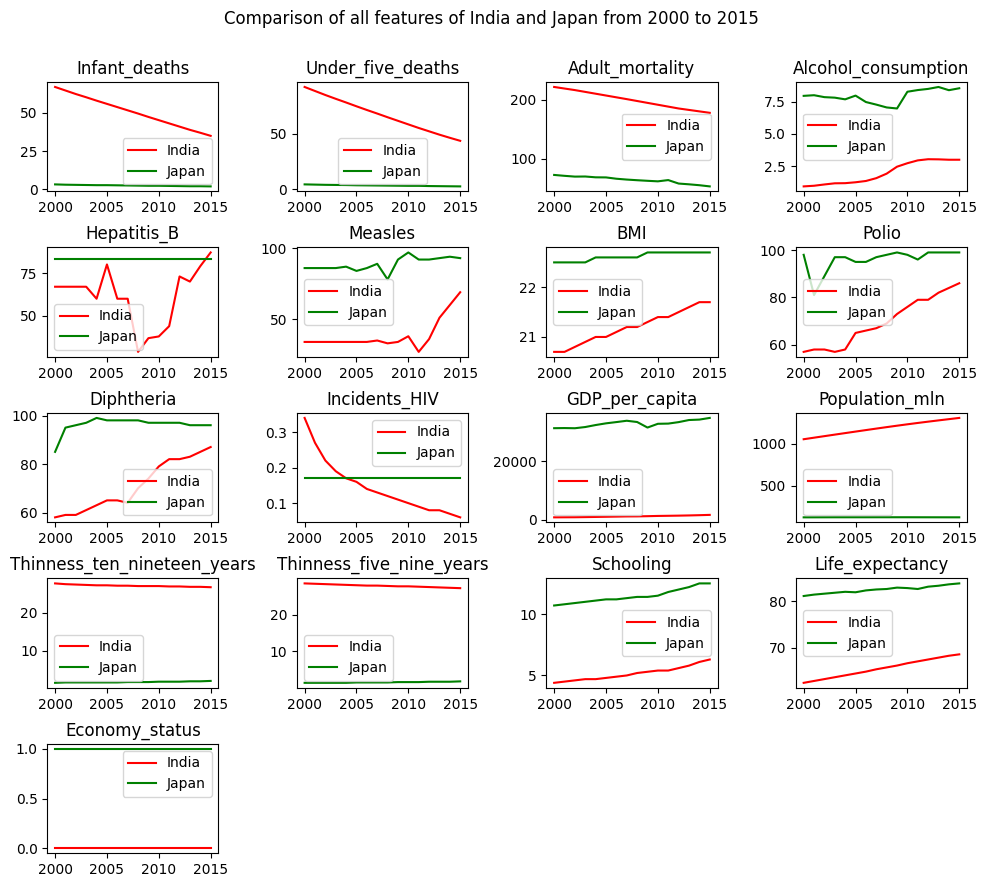

In [37]:
x = year
plt.figure(figsize = (10,9))
x
for i,col in enumerate(column):
   plt.subplot(5,4,i+1)
   plt.tight_layout(h_pad = 1)
   plt.plot(x,df_india[col],'red')
   plt.plot(x,df_japan[col],'green')
   plt.legend(labels = ['India','Japan'])
   plt.title(col)
plt.subplots_adjust(top = 0.9)
plt.suptitle('Comparison of all features of India and Japan from 2000 to 2015')  

   

.

**CLASSIFICATION -- Classify -- Economy_status**

**Segregating Dataset into Independant (X) and Dependant (y) Variables**

In [38]:
X = df.iloc[:,3:-1]
y = df['Economy_status']

**Splitting Dataset into Training and Test Set**

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

**Applying Feature Scaling**

In [40]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

**Creating Classification Models and finding Accuracies of**

*   **K-Nearest Neighbour**
*   **Support Vector Machine Algorithm**
*   **Naive Bayers Algorithm**
*   **Decision Tree**
*   **Random Forest**
  







In [41]:
knn = KNeighborsClassifier(n_neighbors = 5)
sv = SVC(kernel = 'rbf')
nb = GaussianNB()
dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)
rfc = RandomForestClassifier(random_state = 1)

lst = [knn,sv,nb,dtc,rfc]
lst_obj = ['KNN','SVC','NAIVE_BAYERS','DECISION_TREE','RANDOM_FOREST']
acc_score = []

for i in lst:
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  
  accuracy = accuracy_score(y_test,y_pred)*100
  acc_score.append(accuracy)

  #print('Classification Report:','\n',classification_report(y_test,y_pred),'\n')
  #print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

model_accuracy1 = pd.DataFrame({'Algorithm':lst_obj,'Accuracy':acc_score},index = [1,2,3,4,5])
model_accuracy1.style.highlight_max(subset = 'Accuracy',color = 'yellow')


,Algorithm,Accuracy
1,KNN,99.302326
2,SVC,97.674419
3,NAIVE_BAYERS,92.093023
4,DECISION_TREE,98.720930
5,RANDOM_FOREST,99.186047


**Predicting for new observation**

In [42]:
pred1 = []
for a in lst:
  y_pred_new1 = a.predict(std.transform([[2.4, 3.2, 62.1335, 8.28, 83, 97, 22.7, 98,97, 0.17, 32942, 128.07, 1.9, 1.6, 11.5, 82.8]]))
  if y_pred_new1 == 1:
    p1 = 'DEVELOPED'
  else:
    p1 = 'DEVELOPING'
  pred1.append(p1)
  
prediction1 = pd.DataFrame({'Algorithm':lst_obj,'Prediction':p1},index = [1,2,3,4,5])
prediction1

,Algorithm,Prediction
1,KNN,DEVELOPED
2,SVC,DEVELOPED
3,NAIVE_BAYERS,DEVELOPED
4,DECISION_TREE,DEVELOPED
5,RANDOM_FOREST,DEVELOPED


**Balancing the Dataset using Over Sampling (SMOTE) method then applying Classification Models**

In [43]:
df['Economy_status'].value_counts()

0    2272
1     592
Name: Economy_status, dtype: int64

Text(0.5, 1.0, 'Economy_status')

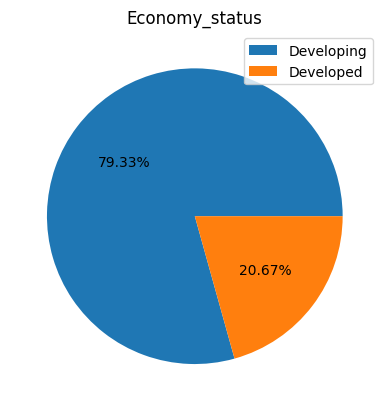

In [44]:
plt.pie(df['Economy_status'].value_counts(),autopct = '%.2f%%')
plt.legend(labels = ['Developing','Developed'])
plt.title('Economy_status')

In [45]:
print(X.shape)
print(y.shape)

(2864, 16)
(2864,)


In [46]:
over_sample = SMOTE(random_state = 1)
X_os,y_os = over_sample.fit_resample(X,y)

print(X_os.shape)
print(y_os.shape)


(4544, 16)
(4544,)


In [47]:
X_train_os,X_test_os,y_train_os,y_test_os = train_test_split(X_os,y_os,test_size = 0.3,random_state = 1)

In [48]:
std_os = StandardScaler()
X_train_os = std_os.fit_transform(X_train_os)
X_test_os = std_os.transform(X_test_os)

In [49]:
knn_os = KNeighborsClassifier(n_neighbors = 5)
sv_os = SVC(kernel = 'rbf')
nb_os = GaussianNB()
dtc_os = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)
rfc_os = RandomForestClassifier(random_state = 1)

lst1 = [knn_os,sv_os,nb_os,dtc_os,rfc_os]
acc_score_balanced = []

for i in lst1:
  i.fit(X_train_os,y_train_os)
  y_pred_os = i.predict(X_test_os)
  
  accuracy = accuracy_score(y_test_os,y_pred_os)*100
  acc_score_balanced.append(accuracy)
  
  #print('Classification Report_over_sampling:','\n',classification_report(y_test_os,y_pred_os),'\n')
  #print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_pred_os))

model_accuracy2 = pd.DataFrame({'Algorithm':lst_obj,'Accuracy_balanced':acc_score_balanced},index = [1,2,3,4,5])
model_accuracy2.style.highlight_max(subset = 'Accuracy_balanced',color = 'yellow')

,Algorithm,Accuracy_balanced
1,KNN,99.560117
2,SVC,98.753666
3,NAIVE_BAYERS,94.648094
4,DECISION_TREE,99.413490
5,RANDOM_FOREST,99.633431


**Predicting for new observation**

In [50]:
pred2 = []
for b in lst1:
  y_pred_new2 = b.predict(std_os.transform([[2.4, 3.2, 62.1335, 8.28, 83, 97, 22.7, 98,97, 0.17, 32942, 128.07, 1.9, 1.6, 11.5, 82.8]]))
  if y_pred_new2 == 1:
    p2 = 'DEVELOPED'
  else:
    p2 = 'DEVELOPING'
  pred2.append(p2)

prediction2 = pd.DataFrame({'Algorithm':lst_obj,'Prediction':p2},index = [1,2,3,4,5])
prediction2

,Algorithm,Prediction
1,KNN,DEVELOPED
2,SVC,DEVELOPED
3,NAIVE_BAYERS,DEVELOPED
4,DECISION_TREE,DEVELOPED
5,RANDOM_FOREST,DEVELOPED


**Applying Feature Selection on Dataset and creating Classification Models**

In [51]:
chi2_features = SelectKBest(chi2,k = 8)
select = chi2_features.fit(X,y)
s = select.scores_
print(s)

[1.61921127e+04 2.41651909e+04 3.62528206e+04 4.23165506e+03
 1.12016090e+02 1.14987113e+03 3.25824177e+01 6.03950756e+02
 6.70781463e+02 5.60051912e+02 3.17032572e+07 1.81221734e+03
 2.00665791e+03 2.05938713e+03 1.35584869e+03 1.00918051e+03]


In [52]:
col = X.columns 
print(col)
df_fs = pd.DataFrame(col,columns = ['Features'])
df_fs['Scores'] = s
df_fs.sort_values('Scores',ascending = False)

Index(['Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Life_expectancy'],
      dtype='object')


,Features,Scores
10,GDP_per_capita,3.170326e+07
2,Adult_mortality,3.625282e+04
1,Under_five_deaths,2.416519e+04
0,Infant_deaths,1.619211e+04
3,Alcohol_consumption,4.231655e+03
13,Thinness_five_nine_years,2.059387e+03
12,Thinness_ten_nineteen_years,2.006658e+03
11,Population_mln,1.812217e+03
14,Schooling,1.355849e+03
5,Measles,1.149871e+03


In [53]:
X_fs = select.fit_transform(X,y)

In [54]:
X_train_fs,X_test_fs,y_train_fs,y_test_fs = train_test_split(X_fs,y,test_size = 0.3,random_state = 1)

In [55]:
std_fs = StandardScaler()
X_train_fs = std_fs.fit_transform(X_train_fs)
X_test_fs = std_fs.transform(X_test_fs)

In [56]:
knn_fs = KNeighborsClassifier(n_neighbors = 5)
sv_fs = SVC(kernel = 'rbf')
nb_fs = GaussianNB()
dtc_fs = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)
rfc_fs = RandomForestClassifier(random_state = 1)


lst2 = [knn_fs,sv_fs,nb_fs,dtc_fs,rfc_fs]
acc_score_feature = []

for i in lst2:
  i.fit(X_train_fs,y_train_fs)
  y_pred_fs = i.predict(X_test_fs)
  
  accuracy = accuracy_score(y_test_fs,y_pred_fs)*100
  acc_score_feature.append(accuracy)
  
  #print('Classification Report_feature:','\n',classification_report(y_test_fs,y_pred_fs),'\n')
  #print(ConfusionMatrixDisplay.from_predictions(y_test_fs,y_pred_fs))

model_accuracy3 = pd.DataFrame({'Algorithm':lst_obj,'Accuracy_feature':acc_score_feature},index = [1,2,3,4,5])
model_accuracy3.style.highlight_max(subset = 'Accuracy_feature',color = 'yellow')

,Algorithm,Accuracy_feature
1,KNN,99.302326
2,SVC,96.976744
3,NAIVE_BAYERS,93.837209
4,DECISION_TREE,98.953488
5,RANDOM_FOREST,99.069767


**Predicting for new obsevation**

In [57]:
pred3 = []
for c in lst2:
  y_pred_new3 = c.predict(std_fs.transform([[32942,62.1335,3.2,2.4,8.28,1.6,1.9,128.07]]))
  if y_pred_new3 == 1:
    p3 = 'DEVELOPED'
  else:
    p3 = 'DEVELOPING'
  pred3.append(p3)
prediction3 = pd.DataFrame({'Algorithm':lst_obj,'Prediction':p3},index = [1,2,3,4,5])
prediction3

,Algorithm,Prediction
1,KNN,DEVELOPING
2,SVC,DEVELOPING
3,NAIVE_BAYERS,DEVELOPING
4,DECISION_TREE,DEVELOPING
5,RANDOM_FOREST,DEVELOPING


**Applying Principal Component Analysis (PCA) on Dataset and creating Classification Models**

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [59]:
std_pca = StandardScaler()
X_train = std_pca.fit_transform(X_train)
X_test = std_pca.transform(X_test)

In [60]:
pca = PCA(n_components = 6)
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)

In [61]:
pca.explained_variance_ratio_

array([0.49960048, 0.11565552, 0.09910724, 0.06968998, 0.04729241,
       0.03995067])

In [62]:
knn_pca = KNeighborsClassifier(n_neighbors = 5)
sv_pca = SVC(kernel = 'rbf')
nb_pca = GaussianNB()
dtc_pca = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)
rfc_pca = RandomForestClassifier(random_state = 1)


lst3 = [knn_pca,sv_pca,nb_pca,dtc_pca,rfc_pca]
acc_score_pca = []

for i in lst3:
  i.fit(X_train_pca,y_train)
  y_pred_pca = i.predict(X_test_pca)
  
  accuracy = accuracy_score(y_test,y_pred_pca)*100
  acc_score_pca.append(accuracy)
  
  #print('Classification Report_pca:','\n',classification_report(y_test,y_pred_pca),'\n')
  #print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pca))

model_accuracy4 = pd.DataFrame({'Algorithm':lst_obj,'Accuracy_pca':acc_score_pca},index = [1,2,3,4,5])
model_accuracy4.style.highlight_max(subset = 'Accuracy_pca',color = 'yellow')

,Algorithm,Accuracy_pca
1,KNN,98.837209
2,SVC,96.395349
3,NAIVE_BAYERS,94.302326
4,DECISION_TREE,98.604651
5,RANDOM_FOREST,98.023256


**Predicting for new observation**

In [63]:
s = std_pca.transform([[2.4, 3.2, 62.1335, 8.28, 83, 97, 22.7, 98,97, 0.17, 32942, 128.07, 1.9, 1.6, 11.5, 82.8]])
s

array([[-1.01711684, -0.89311282, -1.13131942,  0.88174746, -0.07962646,
         1.04589972, -1.0723966 ,  0.76274708,  0.69376289, -0.30784888,
         1.26662302,  0.66228236, -0.65791218, -0.72210821,  1.22695764,
         1.49035253]])

In [64]:
pred4 = []
for d in lst3:
  y_pred_new4 = d.predict([[-0.30784888,-1.13131942,-0.89311282,-1.01711684,0.88174746,-0.65791218,]])
  if y_pred_new4 == 1:
    p4 = 'DEVELOPED'
  else:
    p4 = 'DEVELOPING'
  pred4.append(p4)

prediction4 = pd.DataFrame({'Algorithm':lst_obj,'Prediction':p4},index = [1,2,3,4,5])
prediction4

,Algorithm,Prediction
1,KNN,DEVELOPING
2,SVC,DEVELOPING
3,NAIVE_BAYERS,DEVELOPING
4,DECISION_TREE,DEVELOPING
5,RANDOM_FOREST,DEVELOPING


**Accuracies**

In [65]:
final_accuracy = pd.DataFrame({'Algorithm':lst_obj,'Accuracy':acc_score,'Accuracy_balanced':acc_score_balanced,
                            'Accuracy_feature':acc_score_feature,'Accuracy_pca':acc_score_pca},index = [1,2,3,4,5])
final_accuracy.style.highlight_max(subset = ['Accuracy','Accuracy_balanced','Accuracy_feature','Accuracy_pca'],axis = 0)

,Algorithm,Accuracy,Accuracy_balanced,Accuracy_feature,Accuracy_pca
1,KNN,99.302326,99.560117,99.302326,98.837209
2,SVC,97.674419,98.753666,96.976744,96.395349
3,NAIVE_BAYERS,92.093023,94.648094,93.837209,94.302326
4,DECISION_TREE,98.720930,99.413490,98.953488,98.604651
5,RANDOM_FOREST,99.186047,99.633431,99.069767,98.023256


.



*   The highest accuracy out of all cases is 99.63
*   Random Forest Classification Model gives the highest accuracy when dataset is balanced








**Predictions**

In [66]:
final_Prediction = pd.DataFrame({'Algorithm':lst_obj,'Prediction':pred1,'Pred_balanced':pred2,'Pred_feature':pred3,'Pred_pca':pred4})
final_Prediction

,Algorithm,Prediction,Pred_balanced,Pred_feature,Pred_pca
0,KNN,DEVELOPED,DEVELOPED,DEVELOPING,DEVELOPING
1,SVC,DEVELOPED,DEVELOPED,DEVELOPING,DEVELOPING
2,NAIVE_BAYERS,DEVELOPED,DEVELOPED,DEVELOPING,DEVELOPING
3,DECISION_TREE,DEVELOPED,DEVELOPED,DEVELOPING,DEVELOPING
4,RANDOM_FOREST,DEVELOPED,DEVELOPED,DEVELOPING,DEVELOPING


.

Actual Prediction : DEVELOPED


*  Whether the dataset is balanced or not , all the models gave correct prediction.  
*  As for Feature Selection and PCA, models gave wrong prediction although they have accuracy values grater than 90. 



**REGRESSION -- Predicting -- Life_expectancy**

**Segregating Dataset into Independant (X) and Dependant (y) Variables**

In [67]:
X = df.drop(['Country','Region','Year','Life_expectancy'],axis = 1)
y = df['Life_expectancy']

**Splitting Dataset into Training and Test Set**

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

**Creating and Evaluating Regression Models with r2_scores of**

*   **Linear Regression**
*   **K-Nearest Neighbour Regressor**
*   **Support Vector Regressor**
*   **Decision Tree Regressor**
*   **Random Forest Regressor**

In [69]:
linear_r = LinearRegression()
knn_r = KNeighborsRegressor()
sv_r = SVR()
dt_r = DecisionTreeRegressor(random_state = 4)
rf_r = RandomForestRegressor(random_state = 4)

reg_obj = [linear_r,knn_r,sv_r,dt_r,rf_r]
reg_obj_str = ['Linear','KNN_REG','SV_REG','DT_REG','RF_REG']

r2score = []
mse = []

for obj in reg_obj:
  obj.fit(X_train,y_train)
  y_pred = obj.predict(X_test)
  
  score = r2_score(y_test,y_pred)*100
  r2score.append(score)

  mean_sq_err = mean_squared_error(y_test,y_pred)*100
  mse.append(mean_sq_err)

  
model_score = pd.DataFrame({'Algorithm':reg_obj_str,'R2_Score':r2score,'MSE':mse},index = [1,2,3,4,5])
model_score.style.highlight_max(subset = 'R2_Score',color = 'yellow')

,Algorithm,R2_Score,MSE
1,Linear,97.862500,186.134569
2,KNN_REG,92.696587,635.984837
3,SV_REG,56.949812,3748.831690
4,DT_REG,99.063110,81.584884
5,RF_REG,99.620803,33.020698


**Predicting for new Observation**

In [70]:
newvalue1 = [2.4, 3.2, 62.1335, 8.28, 83, 97, 22.7, 98, 97, 0.17, 32942, 128.07, 1.9, 1.6, 11.5, 1]

pred_1 = []

for ob in reg_obj:
  y_pred_new_1 = ob.predict([newvalue1])
  y_pred_new_11 = y_pred_new_1.item()
  pred_1.append(y_pred_new_11)
   
life_exp = pd.DataFrame({'Algorithm':reg_obj_str,'Life_exp_Prediction':pred_1},index = [1,2,3,4,5])
life_exp

,Algorithm,Life_exp_Prediction
1,Linear,80.740176
2,KNN_REG,78.840000
3,SV_REG,78.901967
4,DT_REG,82.600000
5,RF_REG,82.697000


**Plotting Scatter Diagrams of all features against Life Expectancy**

In [71]:
column = list(df.columns[3:])


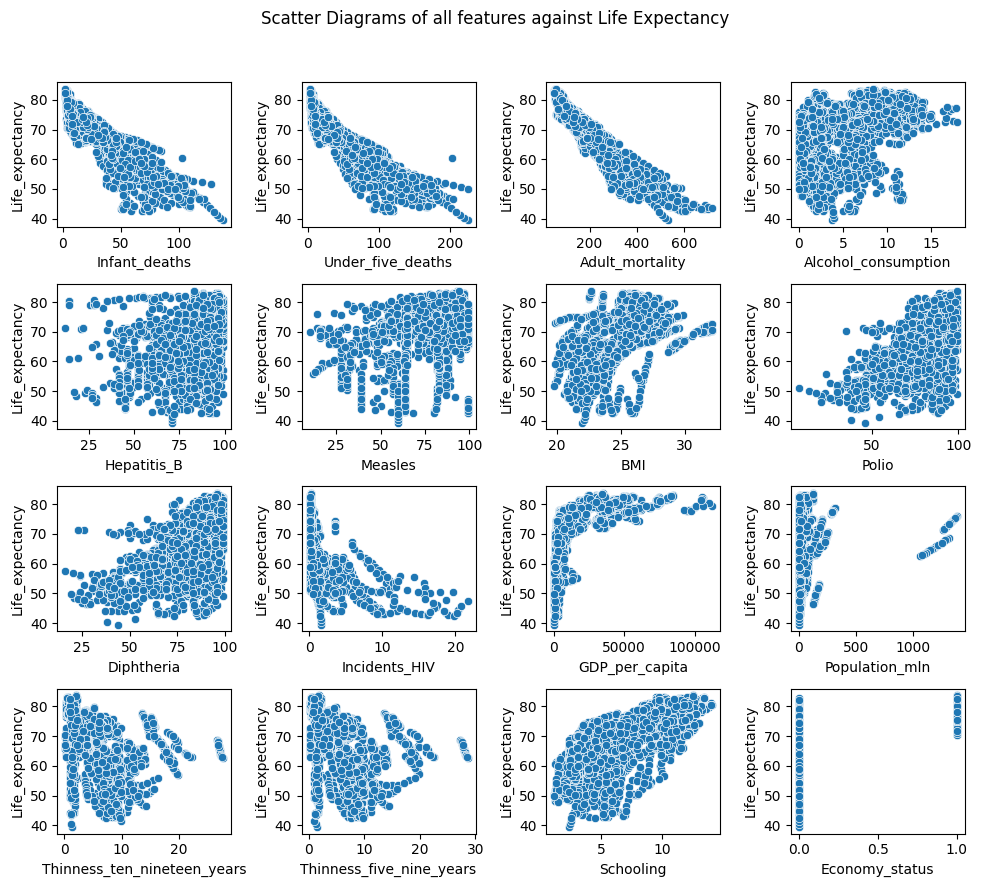

In [72]:
column.pop(-2)
plt.figure(figsize = (10,9))
for i,col in enumerate(column):
  plt.subplot(4,4,i+1)
  plt.tight_layout(h_pad = 1)
  sns.scatterplot(data = df,x = df[col],y = df['Life_expectancy'])
plt.suptitle('Scatter Diagrams of all features against Life Expectancy')
plt.subplots_adjust(top = 0.9)


The scatter diagrams of all these features against  'Life_expextancy' give an idea that, the attributes,  'Infant_deaths', 'Under_five_deaths', 'Adult_morality' have strong negative correlation with 'Life_expectancy'. For those features the observations are scattered linearly.


In [73]:
#Displaying correlation values of 'Life_expectancy' with all other features
corr_matrix[15:16]

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy,Economy_status
Life_expectancy,-0.920032,-0.920419,-0.94536,0.399159,0.417804,0.490019,0.598423,0.641217,0.627541,-0.553027,0.58309,0.026298,-0.467824,-0.458166,0.732484,1.0,0.523791


From the scatter plots and correlation values, the dependant variable (X) can take some of the features such that its correlation is highly positive and highly negative

In [74]:
X1 = pd.concat([df.iloc[:,3:6],df.iloc[:,10:12],df.iloc[:,-3]],axis = 1)
y1 = df['Life_expectancy']

In [75]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.3,random_state = 1)

In [76]:
linear_r1 = LinearRegression()
knn_r1 = KNeighborsRegressor()
sv_r1 = SVR()
dt_r1 = DecisionTreeRegressor(random_state = 4)
rf_r1 = RandomForestRegressor(random_state = 4)

reg_obj_r1 = [linear_r1,knn_r1,sv_r1,dt_r1,rf_r1]
reg_obj_str_r1 = ['Linear','KNN_REG','SV_REG','DT_REG','RF_REG']

r2score_1 = []
mse_1 = []

for obj1 in reg_obj_r1:
  obj1.fit(X1_train,y1_train)
  y_pred1 = obj1.predict(X1_test)
  
  score = r2_score(y1_test,y_pred1)*100
  r2score_1.append(score)

  mean_sq_err = mean_squared_error(y1_test,y_pred1)*100
  mse_1.append(mean_sq_err)

  
model_score1 = pd.DataFrame({'Algorithm':reg_obj_str_r1,'R2_Score':r2score_1,'MSE':mse_1},index = [1,2,3,4,5])
model_score1.style.highlight_max(subset = 'R2_Score',color = 'yellow')

,Algorithm,R2_Score,MSE
1,Linear,97.336968,231.898162
2,KNN_REG,98.737453,109.943209
3,SV_REG,97.789708,192.473311
4,DT_REG,98.195455,157.140698
5,RF_REG,99.088396,79.382901


**Predicting for new Observation**

In [77]:
newvalue2 = [2.4, 3.2, 62.1335,98,97,11.5]
pred_2 = []
for obj2 in reg_obj_r1:
  y_pred_new_2 = obj2.predict([newvalue2])
  y_pred_new_22 = y_pred_new_2.item()
  pred_2.append(y_pred_new_22)

   
life_exp1 = pd.DataFrame({'Algorithm':reg_obj_str,'Life_exp_Prediction':pred_2},index = [1,2,3,4,5])
life_exp1

,Algorithm,Life_exp_Prediction
1,Linear,79.612635
2,KNN_REG,80.820000
3,SV_REG,80.309540
4,DT_REG,81.500000
5,RF_REG,81.352000


**R2_SCORES of all models when X takes all features and when X takes features that have high correlation with Life_ecpectancy** 

In [78]:
r2score_final = pd.DataFrame({'Algorithm':reg_obj_str,'R2_Score_X_all':r2score,'MSE_X_all':mse,
                                                    'R2_Score_X_slice':r2score_1,'MSE_X_slice':mse_1})
r2score_final.style.highlight_max(subset = ['R2_Score_X_all','R2_Score_X_slice'],axis = 0)

,Algorithm,R2_Score_X_all,MSE_X_all,R2_Score_X_slice,MSE_X_slice
0,Linear,97.862500,186.134569,97.336968,231.898162
1,KNN_REG,92.696587,635.984837,98.737453,109.943209
2,SV_REG,56.949812,3748.831690,97.789708,192.473311
3,DT_REG,99.063110,81.584884,98.195455,157.140698
4,RF_REG,99.620803,33.020698,99.088396,79.382901


.

* From the above table its clear that Random Forest Regressor gives  best result, since it has maximum r2_score in both situations. That is, when X assumes all features and when X assumes features that has maximum correlation with Life_expectancy.
* The r2_scores of KNeighbor Regression model and especially, Support Vector Regression model has significantly increased when X assumes correlated features with Life_expectancy.  





.

**Predictions of all models when X takes all features and when X takes features that have high correlation with Life_expectancy**

In [79]:
prediction_final = pd.DataFrame({'Algorithm':reg_obj_str,'Pred_X_all':pred_1,'Pred_X_slice':pred_2})
prediction_final

,Algorithm,Pred_X_all,Pred_X_slice
0,Linear,80.740176,79.612635
1,KNN_REG,78.840000,80.820000
2,SV_REG,78.901967,80.309540
3,DT_REG,82.600000,81.500000
4,RF_REG,82.697000,81.352000


.

As for predictions, Random Forest Regressor gave the best predicted value = 82.697 (Actual value = 82.8) when X assumes all features.